## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys



## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [66]:
df=pd.read_csv('QueryResults.csv',names=['DATE','TAG','POSTS'],header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [67]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [68]:
df.shape

(2566, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [69]:
df.count()

DATE     2566
TAG      2566
POSTS    2566
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [70]:
df.groupby('TAG').sum()



,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43778
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,401708
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1608071
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,802487
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51570
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,71843
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1910485
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2517619
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67991


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [71]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,185,185
c,185,185
c#,186,186
c++,185,185
delphi,185,185
go,170,170
java,185,185
javascript,185,185
perl,185,185


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [72]:
df['DATE']=pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


Data manipulation

In [73]:
pivoted_df= df.pivot(index="DATE",columns="TAG",values="POSTS")


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [74]:
pivoted_df.shape

(186, 14)

In [75]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


In [76]:
pivoted_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-08-01,143.0,859.0,3644.0,1668.0,106.0,492.0,3823.0,6759.0,49.0,1764.0,10218.0,2358.0,201.0,971.0
2023-09-01,157.0,873.0,3052.0,1492.0,105.0,424.0,3333.0,5702.0,61.0,1667.0,8625.0,2038.0,192.0,862.0
2023-10-01,175.0,975.0,3202.0,1724.0,165.0,423.0,3448.0,5505.0,53.0,1547.0,9055.0,2067.0,196.0,905.0
2023-11-01,173.0,962.0,3125.0,1472.0,104.0,411.0,3308.0,5246.0,44.0,1409.0,8534.0,2005.0,157.0,873.0
2023-12-01,182.0,880.0,2676.0,1477.0,75.0,335.0,2617.0,4860.0,53.0,1227.0,7138.0,1617.0,157.0,758.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [77]:
pivoted_df.count()

TAG
assembly      185
c             185
c#            186
c++           185
delphi        185
go            170
java          185
javascript    185
perl          185
php           185
python        185
r             183
ruby          185
swift         177
dtype: int64

In [78]:
pivoted_df.fillna(0,inplace=True)

In [79]:
pivoted_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

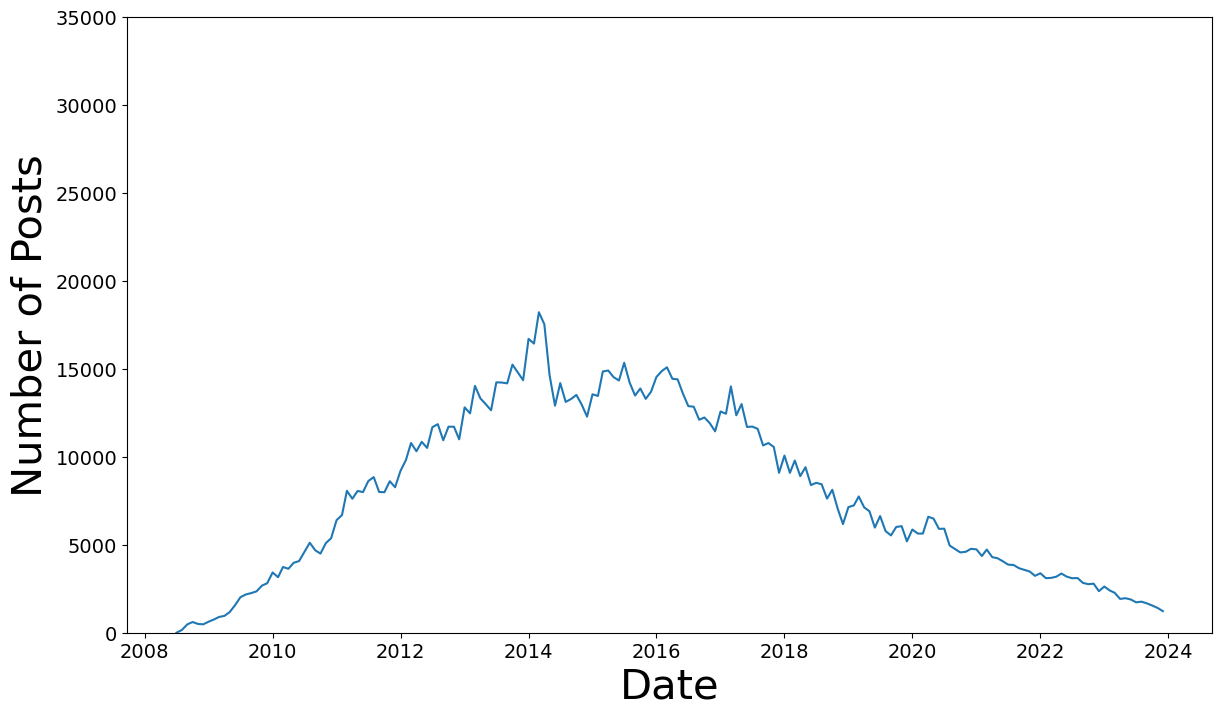

In [80]:
plt.figure(figsize=(14,8))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Posts",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylim(0,35000)
plt.plot(pivoted_df.index,pivoted_df.php,label="php")



**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

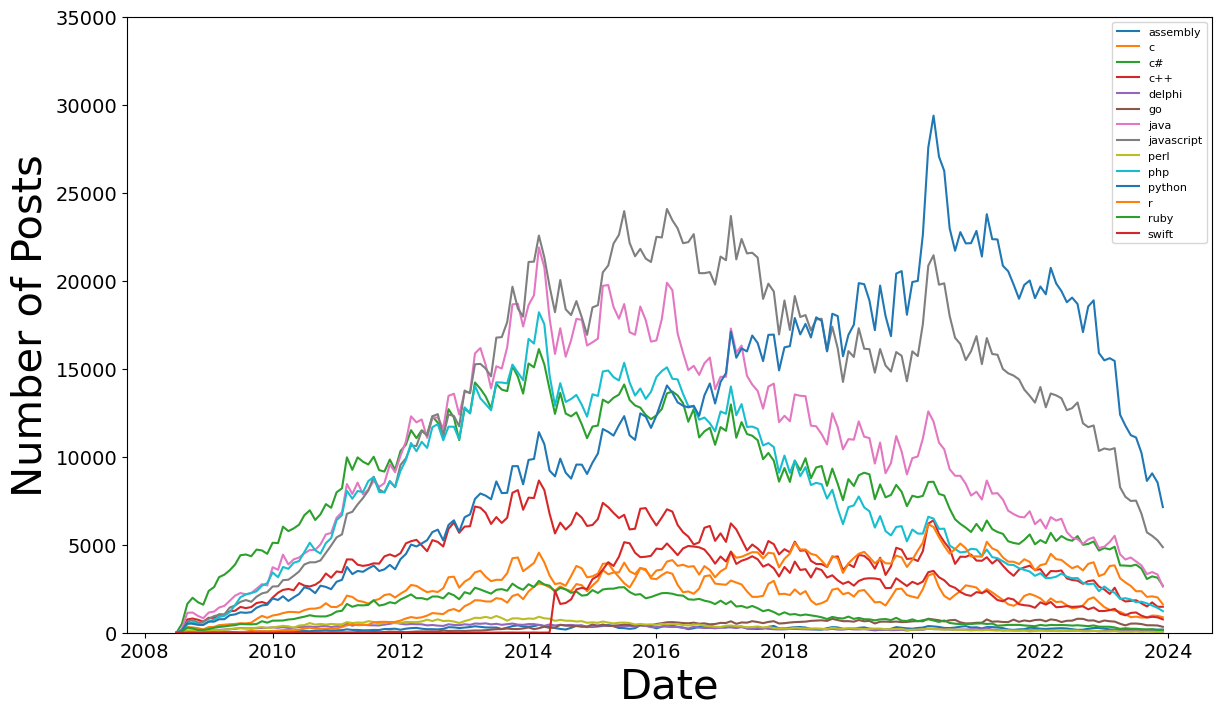

In [81]:
plt.figure(figsize=(14,8))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Posts",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylim(0,35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index,pivoted_df[column],label=pivoted_df[column].name)
plt.legend(fontsize=8)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [89]:
rolled_df=pivoted_df.rolling(window=12).mean()
rolled_df.head(20)


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


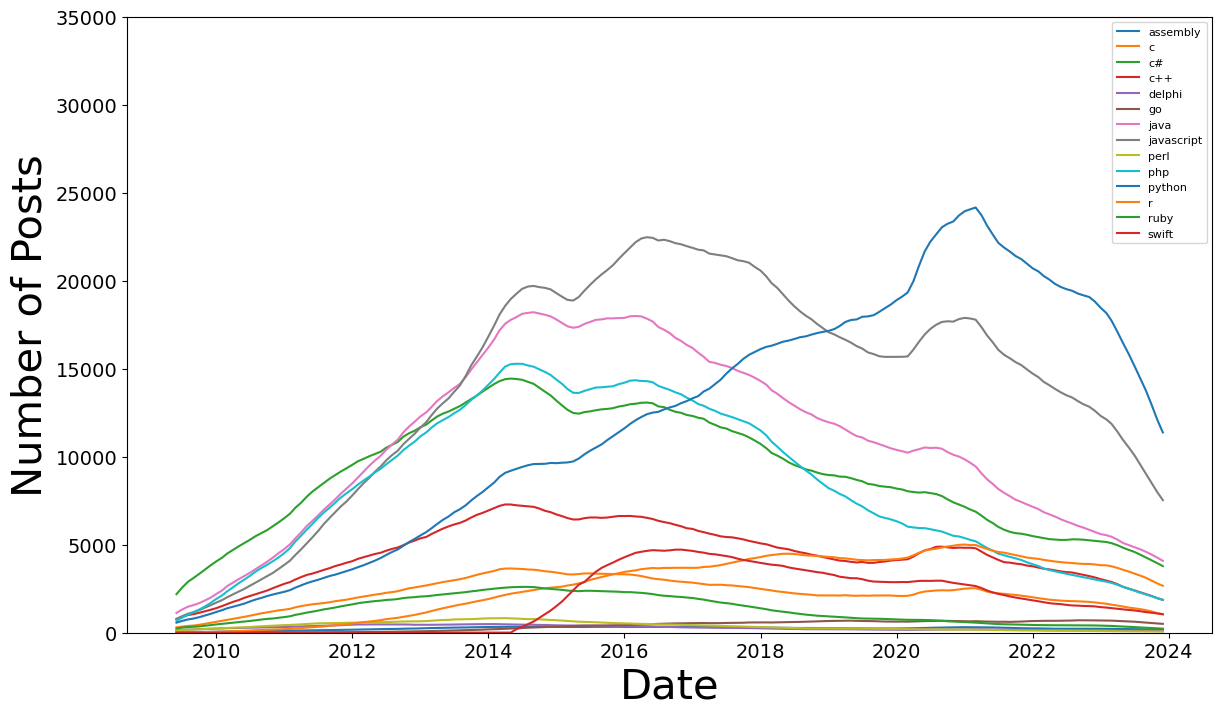

In [90]:
plt.figure(figsize=(14,8))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Posts",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylim(0,35000)

for column in pivoted_df.columns:
    plt.plot(rolled_df.index,rolled_df[column],label=rolled_df[column].name)
plt.legend(fontsize=8)